In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset
import numpy as np
from datasets import load_dataset
from collections import Counter
from itertools import chain

In [9]:
dataset = Dataset.from_file("./data/big_math/big-math-rl-verified-train.arrow")
print(dataset[0])

{'problem': 'Given $p$: $|4x-3|\\leqslant 1$ and $q$: $x^{2}-(2a+1)x+a^{2}+a\\leqslant 0$, find the range of values for $a$ if $p$ is a necessary but not sufficient condition for $q$.', 'answer': '[0, \\\\frac{1}{2}]', 'source': 'cn_k12', 'domain': ['Mathematics -> Algebra -> Equations and Inequalities -> Other'], 'llama8b_solve_rate': 0.125}


In [10]:
df = dataset.to_pandas()

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251122 entries, 0 to 251121
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   problem             251122 non-null  object 
 1   answer              251122 non-null  object 
 2   source              251122 non-null  object 
 3   domain              251122 non-null  object 
 4   llama8b_solve_rate  251118 non-null  float64
dtypes: float64(1), object(4)
memory usage: 9.6+ MB
None


In [12]:
# Độ dài của problem và answer
df['problem_len'] = df['problem'].apply(len)
df['answer_len'] = df['answer'].apply(len)

# Thống kê cơ bản
print(df[['problem_len', 'answer_len']].describe())

domain_counts = Counter(chain.from_iterable(df['domain']))
domain_df = pd.DataFrame(domain_counts.items(), columns=['domain', 'count']).sort_values(by='count', ascending=False)
print(domain_df)


         problem_len     answer_len
count  251122.000000  251122.000000
mean      207.924742       8.133003
std       119.402415      14.704382
min        10.000000       1.000000
25%       129.000000       2.000000
50%       183.000000       3.000000
75%       256.000000      10.000000
max      3152.000000    1222.000000
                                                domain  count
22   Mathematics -> Applied Mathematics -> Math Wor...  85181
14                     Mathematics -> Algebra -> Other  14559
0    Mathematics -> Algebra -> Equations and Inequa...  14432
11   Mathematics -> Geometry -> Plane Geometry -> O...  14316
3       Mathematics -> Algebra -> Sequences and Series   7511
..                                                 ...    ...
433  Mathematics -> Algebra -> Equations and Inequa...      1
437  Mathematics -> Algebra -> Prealgebra -> Whole ...      1
438  Mathematics -> Number Theory -> HCF and LCM ->...      1
439  Mathematics -> Number Theory -> Odd Divisors -...  

CÂU HỎI:
Min: 1, Max: 495, Mean: 37.72, Median: 34.0, Std: 22.29
CÂU TRẢ LỜI:
Min: 0, Max: 213, Mean: 1.76, Median: 1.0, Std: 2.54


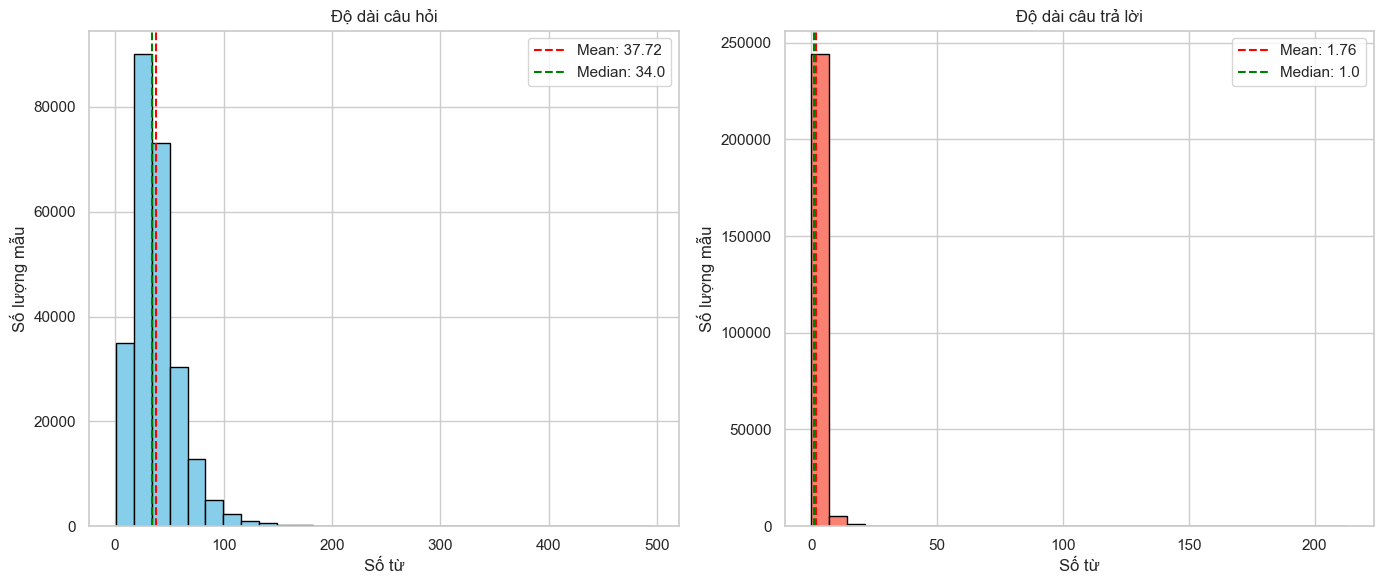

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Tính độ dài câu hỏi và lời giải
query_lengths = [len(example['problem'].split()) for example in dataset]
response_lengths = [len(example['answer'].split()) for example in dataset]

# ===== Thống kê câu hỏi =====
q_min = np.min(query_lengths)
q_max = np.max(query_lengths)
q_mean = np.mean(query_lengths)
q_median = np.median(query_lengths)
q_std = np.std(query_lengths)

# ===== Thống kê lời giải =====
r_min = np.min(response_lengths)
r_max = np.max(response_lengths)
r_mean = np.mean(response_lengths)
r_median = np.median(response_lengths)
r_std = np.std(response_lengths)

# ===== In thống kê =====
print("CÂU HỎI:")
print(f"Min: {q_min}, Max: {q_max}, Mean: {q_mean:.2f}, Median: {q_median}, Std: {q_std:.2f}")
print("CÂU TRẢ LỜI:")
print(f"Min: {r_min}, Max: {r_max}, Mean: {r_mean:.2f}, Median: {r_median}, Std: {r_std:.2f}")

# ===== Vẽ biểu đồ so sánh =====
plt.figure(figsize=(14,6))

# Câu hỏi
plt.subplot(1,2,1)
plt.hist(query_lengths, bins=30, color='skyblue', edgecolor='black')
plt.axvline(q_mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {q_mean:.2f}')
plt.axvline(q_median, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {q_median}')
plt.title("Độ dài câu hỏi")
plt.xlabel("Số từ"); plt.ylabel("Số lượng mẫu")
plt.legend()
plt.grid(True)

# Lời giải
plt.subplot(1,2,2)
plt.hist(response_lengths, bins=30, color='salmon', edgecolor='black')
plt.axvline(r_mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {r_mean:.2f}')
plt.axvline(r_median, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {r_median}')
plt.title("Độ dài câu trả lời")
plt.xlabel("Số từ"); plt.ylabel("Số lượng mẫu")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


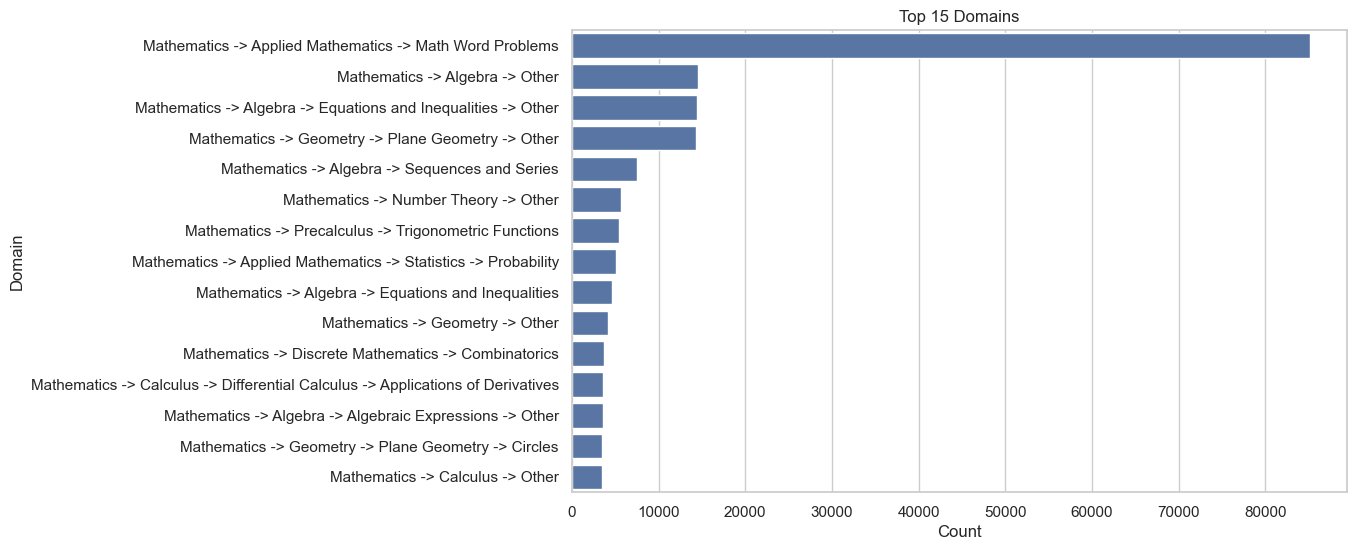

In [14]:
# Biểu đồ domain phổ biến
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='domain', data=domain_df.head(15))
plt.title("Top 15 Domains")
plt.xlabel("Count")
plt.ylabel("Domain")
plt.show()